In [1]:
import yfinance as yf

# Download full historical data with automatic adjustments
data = yf.download("MSFT", period="max",auto_adjust=False)
data.reset_index(inplace=True)

# Save the data to a CSV file
data.to_csv("MSFT.csv",index=False)
print("Data downloaded successfully!")

[*********************100%***********************]  1 of 1 completed

Data downloaded successfully!


In [2]:
import pandas as pd
df = pd.read_csv('MSFT.csv')

In [3]:
df

,Date,Adj Close,Close,High,Low,Open,Volume
0,NaN,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT
1,1986-03-13,0.05970705300569534,0.09722200036048889,0.1015629991889,0.08854199945926666,0.08854199945926666,1031788800
2,1986-03-14,0.06183928996324539,0.10069400072097778,0.10243099927902222,0.09722200036048889,0.09722200036048889,308160000
3,1986-03-17,0.06290601938962936,0.10243099927902222,0.10329899936914444,0.10069400072097778,0.10069400072097778,133171200
4,1986-03-18,0.06130622699856758,0.09982600063085556,0.10329899936914444,0.09895800054073334,0.10243099927902222,67766400
...,...,...,...,...,...,...,...
9822,2025-03-06,396.8900146484375,396.8900146484375,402.1499938964844,392.67999267578125,394.2799987792969,23304600
9823,2025-03-07,393.30999755859375,393.30999755859375,394.79998779296875,385.5400085449219,392.32000732421875,22034100
9824,2025-03-10,380.1600036621094,380.1600036621094,386.3999938964844,377.2200012207031,385.8399963378906,32840100
9825,2025-03-11,380.45001220703125,380.45001220703125,386.0,376.9100036621094,379.0,30380200


In [4]:
df = df.iloc[1:].reset_index(drop=True)
df

,Date,Adj Close,Close,High,Low,Open,Volume
0,1986-03-13,0.05970705300569534,0.09722200036048889,0.1015629991889,0.08854199945926666,0.08854199945926666,1031788800
1,1986-03-14,0.06183928996324539,0.10069400072097778,0.10243099927902222,0.09722200036048889,0.09722200036048889,308160000
2,1986-03-17,0.06290601938962936,0.10243099927902222,0.10329899936914444,0.10069400072097778,0.10069400072097778,133171200
3,1986-03-18,0.06130622699856758,0.09982600063085556,0.10329899936914444,0.09895800054073334,0.10243099927902222,67766400
4,1986-03-19,0.06024006009101868,0.09809000045061111,0.10069400072097778,0.09722200036048889,0.09982600063085556,47894400
...,...,...,...,...,...,...,...
9821,2025-03-06,396.8900146484375,396.8900146484375,402.1499938964844,392.67999267578125,394.2799987792969,23304600
9822,2025-03-07,393.30999755859375,393.30999755859375,394.79998779296875,385.5400085449219,392.32000732421875,22034100
9823,2025-03-10,380.1600036621094,380.1600036621094,386.3999938964844,377.2200012207031,385.8399963378906,32840100
9824,2025-03-11,380.45001220703125,380.45001220703125,386.0,376.9100036621094,379.0,30380200


In [5]:
df = df[['Date','Close']]
df

,Date,Close
0,1986-03-13,0.09722200036048889
1,1986-03-14,0.10069400072097778
2,1986-03-17,0.10243099927902222
3,1986-03-18,0.09982600063085556
4,1986-03-19,0.09809000045061111
...,...,...
9821,2025-03-06,396.8900146484375
9822,2025-03-07,393.30999755859375
9823,2025-03-10,380.1600036621094
9824,2025-03-11,380.45001220703125


In [6]:
df['Date']

,Date
0,1986-03-13
1,1986-03-14
2,1986-03-17
3,1986-03-18
4,1986-03-19
...,...
9821,2025-03-06
9822,2025-03-07
9823,2025-03-10
9824,2025-03-11


In [7]:
import datetime
import numpy as np

def str_to_datetime(s):
    if isinstance(s, float) and np.isnan(s):  # Skip NaN values
        return None  # Or return pd.NaT
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year, month, day)

df['Date'] = df['Date'].apply(str_to_datetime)

<ipython-input-7-314b9020bbf3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


In [8]:
# df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

,Date
0,1986-03-13
1,1986-03-14
2,1986-03-17
3,1986-03-18
4,1986-03-19
...,...
9821,2025-03-06
9822,2025-03-07
9823,2025-03-10
9824,2025-03-11


In [9]:
df.index = df.pop('Date')
df

,Close
Date,
1986-03-13,0.09722200036048889
1986-03-14,0.10069400072097778
1986-03-17,0.10243099927902222
1986-03-18,0.09982600063085556
1986-03-19,0.09809000045061111
...,...
2025-03-06,396.8900146484375
2025-03-07,393.30999755859375
2025-03-10,380.1600036621094


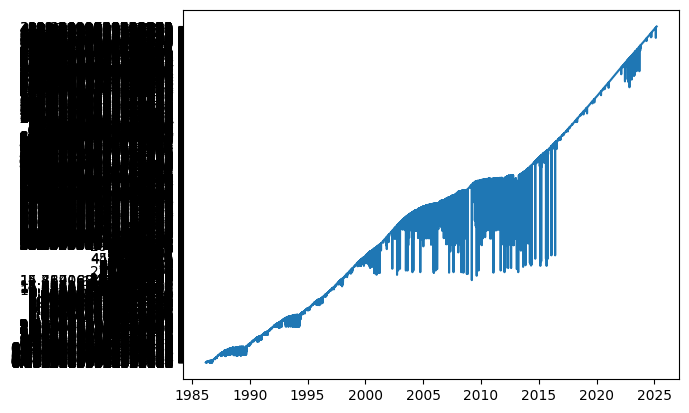

In [10]:
import matplotlib.pyplot as plt
plt.plot(df.index, df['Close'])

In [11]:
# as we're using the LSTM model we need to convert this in supervised L problem
# as LSTM requires past values

import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0,n):
    X[:,1]
    ret_df[f'Target-{n-i}'] = X[:,i]

  ret_df['Target'] = Y
  return ret_df

windowed_df = df_to_windowed_df(
    df,
    '2021-03-25',    # changing this date from beggning to 25th for furhter predictions
    '2022-03-23',
    n=3
)

windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.99000549316406,237.5800018310547,235.4600067138672,232.33999633789062
1,2021-03-26,237.5800018310547,235.4600067138672,232.33999633789062,236.47999572753906
2,2021-03-29,235.4600067138672,232.33999633789062,236.47999572753906,235.24000549316406
3,2021-03-30,232.33999633789062,236.47999572753906,235.24000549316406,231.85000610351562
4,2021-03-31,236.47999572753906,235.24000549316406,231.85000610351562,235.77000427246094
...,...,...,...,...,...
247,2022-03-17,276.44000244140625,287.1499938964844,294.3900146484375,295.2200012207031
248,2022-03-18,287.1499938964844,294.3900146484375,295.2200012207031,300.42999267578125
249,2022-03-21,294.3900146484375,295.2200012207031,300.42999267578125,299.1600036621094
250,2022-03-22,295.2200012207031,300.42999267578125,299.1600036621094,304.05999755859375


Target-3, -2, -1 are the i/p and target is the o/p

In [12]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)
dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

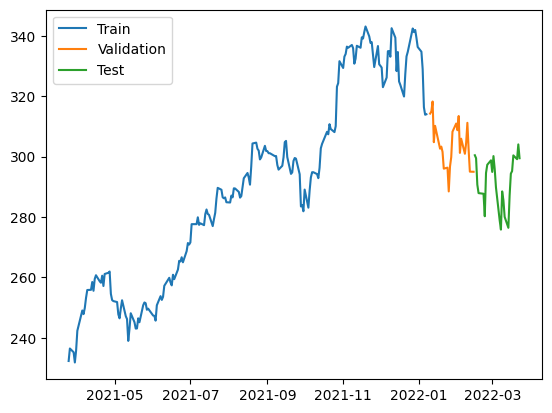

In [13]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])   # o/p

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 85370.3516 - mean_absolute_error: 290.4292 - val_loss: 92212.5781 - val_mean_absolute_error: 303.5780
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 84250.7188 - mean_absolute_error: 288.5211 - val_loss: 91963.1016 - val_mean_absolute_error: 303.1668
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 83299.3359 - mean_absolute_error: 286.8989 - val_loss: 91687.1016 - val_mean_absolute_error: 302.7113
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 82909.1719 - mean_absolute_error: 286.1120 - val_loss: 91326.4766 - val_mean_absolute_error: 302.1151
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 82967.0000 - mean_absolute_error: 286.2998 - val_loss: 90816.2188 - val_mean_absolute_error: 301.2694
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 84184.0312 - mean_absolute_error: 288.4820 - val_loss: 90128.1719 - val_mean_absolute_error: 300.1252
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


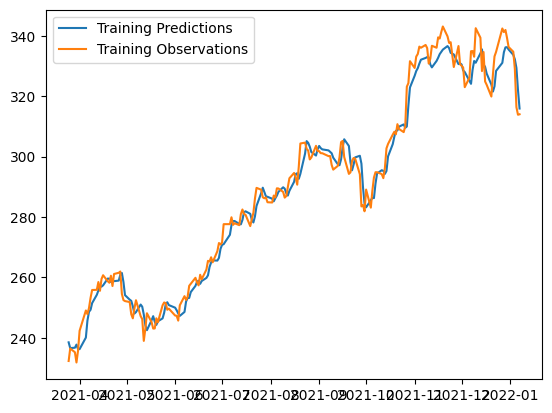

In [15]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


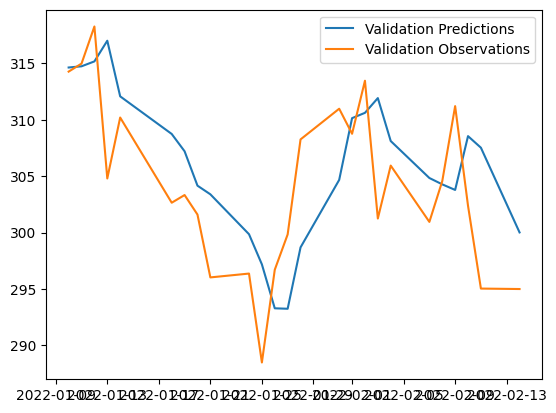

In [16]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


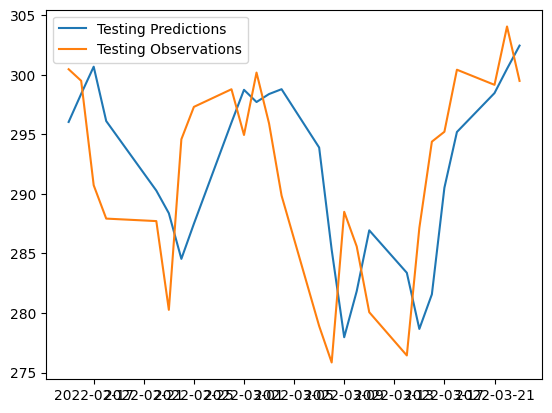

In [17]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

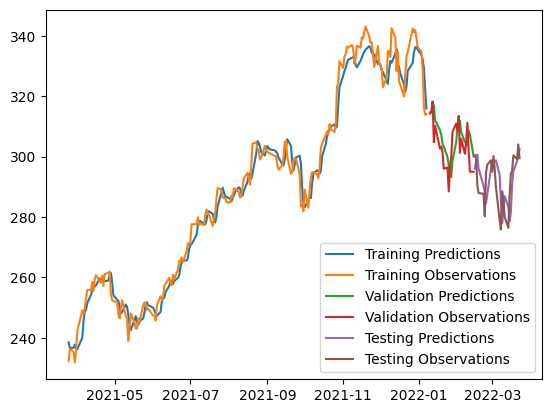

In [18]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [19]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━

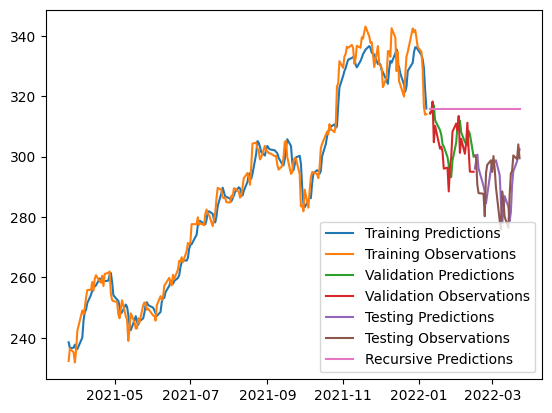

In [20]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])